# Assignment 4: Spam classification using Naïve Bayes

## Viktor Olsson (17 h) and Johan Wallgren (17 h)

In [1]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is a package for nice-looking graphics
import numpy as np
import email.policy
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
#Import scikit-learn dataset library
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from IPython.display import display_html
from itertools import chain,cycle
from email import message_from_string

In [2]:
# functions
# display_side_by_side function:
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    
# converting bz2 file to dataframe
def bz2_to_df(bz2, label): 
    dataframe = []
    for bz2_file in bz2:
        tfile = tarfile.open(bz2_file, 'r:bz2')
        for file in tfile.getmembers():
            df = tfile.extractfile(file)
            if df is not None:
                df = df.read()
                dataframe.append({'email': df.decode('latin-1'), 'filetype': label,
                                  'policy': message_from_string(df.decode('latin-1'),policy=email.policy.default)})
        tfile.close()
    return pd.DataFrame(dataframe)

# Naïve Bayes classifier, classifies the test sets and reports the percentage of ham
# and spam test sets that were classified correctly in a confusion matrix.
# includes some code from notebook naïve_bayes_intro
def naive_bayes(ham,spam,word_filter): #word_filter range [0.0,0.5)
    # concatinate the two dataframes and split into data ('email') and target ('filetype')
    dataframe = pd.concat([ham,spam])
    vectorizer = CountVectorizer(max_df=(1.0-word_filter), min_df=word_filter)
    data = vectorizer.fit_transform(dataframe['email'])
    target = dataframe['filetype']
    # Split dataset into training set and test set (70-30)
    datatrain, datatest, targettrain, targettest = train_test_split(data, target, test_size=0.3, random_state = 0)
    
    #Multinominal classifier
    mulinominal = MultinomialNB()
    mulinominal.fit(datatrain,targettrain)
    multinominal_pred = mulinominal.predict(datatest)
    multinominal_score = metrics.accuracy_score(targettest, multinominal_pred)
    multinominal_cm = metrics.confusion_matrix(targettest, multinominal_pred, normalize = 'true')
    
    #Bernoulli classifier
    bernoulli = BernoulliNB(binarize=0.0)
    bernoulli.fit(datatrain,targettrain)
    bernoulli_pred = bernoulli.predict(datatest)
    bernoulli_score = metrics.accuracy_score(targettest, bernoulli_pred)
    bernoulli_cm = metrics.confusion_matrix(targettest, bernoulli_pred, normalize = 'true')
    
    #plot the two confusion matrices as subplots
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(18,6))
    sns.heatmap(multinominal_cm, ax = ax1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    sns.heatmap(bernoulli_cm, ax = ax2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    label = ['ham','spam']
    ax1.set_title('Multinominal accuracy score: {0}'.format(multinominal_score))
    ax1.set_xticklabels(label)
    ax1.set_yticklabels(label)
    ax1.set_ylabel('Actual label');
    ax1.set_xlabel('Predicted label');
    ax2.set_title('Bernoulli accuracy score: {0}'.format(bernoulli_score))
    ax2.set_xticklabels(label)
    ax2.set_yticklabels(label)
    ax2.set_ylabel('Actual label');
    ax2.set_xlabel('Predicted label');
    plt.show()
    
# Extract message part of email
# https://stackoverflow.com/questions/30517621/python-get-the-body-of-an-multipart-email
def cutEmail(message):
    if message.is_multipart():
        for part in message.get_payload():
            body = part.get_payload().__str__()
    else:
        body = message.get_payload().__str__()
    return body

## 1. Preprocessing:

### a. 
*Note that the email files contain a lot of extra information, besides the actual message. 
Ignore that for now and run on the entire text. Further down (in the higher grade part), 
you will be asked to filter out the headers and footers.*

### b.
*We don’t want to train and test on the same data. Split the spam and the ham datasets 
in a training set and a test set.*

In [3]:
#Using both easy_ham and hard_ham to get a different result than in question 3.
easy_ham = bz2_to_df(['../../datasets/20021010_easy_ham.tar.bz2'], 'ham')
hard_ham = bz2_to_df(['../../datasets/20021010_hard_ham.tar.bz2'], 'ham')
ham = pd.concat([easy_ham,hard_ham])
spam = bz2_to_df(['../../datasets/20021010_spam.tar.bz2'], 'spam')

# Splitting dataset into training set and test set in the function

## 2. Write a Python program that:

### a.
*Uses four datasets (hamtrain, spamtrain, hamtest, and spamtest)*

Splitting the data into four datasets (hamtrain, spamtrain, hamtest, and spamtest) seems like a wierd aproach to the problem. Because then the AI would train and test on ham-mails and spam-mails separatly, instead of training and testing on both spam-mails and ham-mails at the same time. 

So instead of using four datasets (hamtrain, spamtrain, hamtest, and spamtest), two dataframes (ham, spam) are used. The function concatinates the two dataframes and split it into two datasets called data and target. Data contains all the emails (both spam and ham) and target contains the filetypes (both spam and ham). Then the two datasets are split into training sets and test sets (datatrain, datatest, targettrain, targettest).

### b. 
*Using a Naïve Bayes classifier (e.g. Sklearn), classifies the test sets and reports the 
percentage of ham and spam test sets that were classified correctly. You can use 
CountVectorizer to transform the email texts into vectors. Please note that there are 
different types of Naïve Bayes Classifier in SKlearn (Document is available here). Test two 
of these classifiers: 1. Multinomial Naive Bayes and 2. Bernoulli Naive Bayes that are well 
suited for this problem. For the case of Bernoulli Naive Bayes you should use the 
parameter binarize to make the features binary. Discuss the differences between these 
two classifiers.*

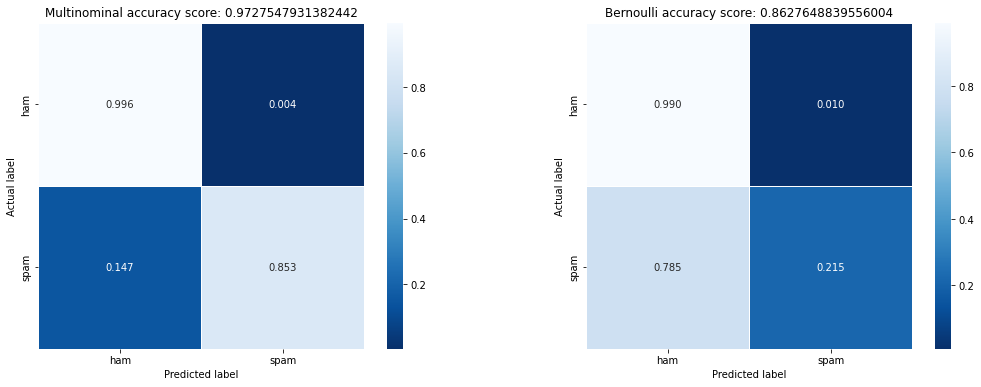

In [4]:
naive_bayes(ham,spam,0.0) # 0.0 = no word filter

The multinominal classifier performs well, since it almost predicts all the ham mails correctly and predicts 85% of the spam correctly. The bernoulli classifier, however, performs rather ill, since it predicts almost all ham mails correctly but missclassifies 78% of the spam mails. In other words, the bernoulli classifier misses alot of the spam mails.

Multinominal is a model that counts every occurance of a word in a document compared to the model Bernoulli that in a binary way checks if a feature is present or absent.

Multinominal naïves bayes works by traversing through the train dataset while counting every feature and calculating the probability for that feature to either be in "ham" or "spam", depending on the label of the feature. When all features have been processed and the likelihoods have been calculated the model is ready to be tested. The model calculates a score by multiplying the prior probability with the probability for each feature found in the test input. This is done for both "spam" and "ham". These two scores are then comapred and the greater gets picked.

Bernoulli naïves bayes instead check if features are present or absent. This trains the model to select "spam" when features are found.

## 3. Run your program on

### i. Spam versus easy-ham

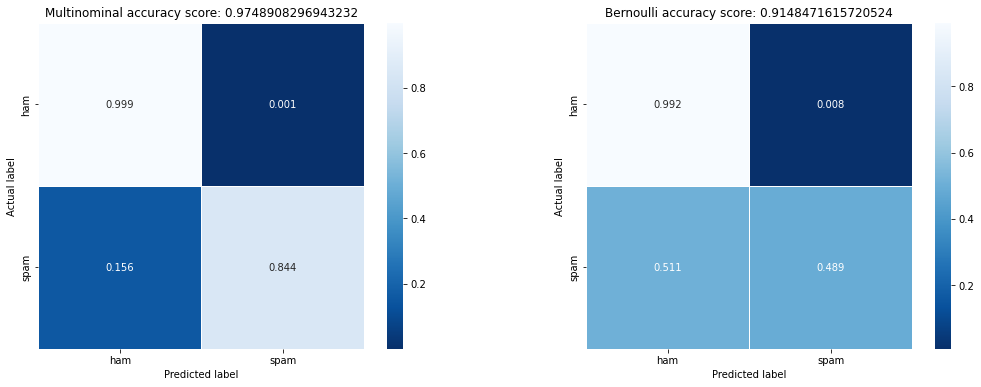

In [5]:
ham = bz2_to_df(['../../datasets/20021010_easy_ham.tar.bz2'], 'ham')
spam = bz2_to_df(['../../datasets/20021010_spam.tar.bz2'], 'spam')

naive_bayes(ham,spam,0.0) # 0.0 = no word filter

When only using the easy_ham dataset, similar results as in question 2b can be seen. The multinominal classifier performs almost exactly the same, but the bernoulli classifier performs slightly better and "only" missclassifies 51% of the spam mail. However, this is still a pretty bad result since it misses over half of the spam mails.

### ii. Spam versus hard-ham

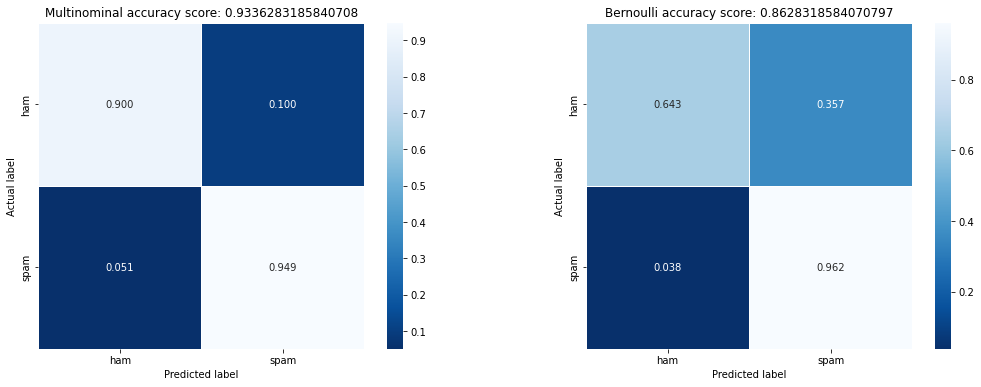

In [6]:
ham = bz2_to_df(['../../datasets/20021010_hard_ham.tar.bz2'], 'ham')
spam = bz2_to_df(['../../datasets/20021010_spam.tar.bz2'], 'spam')

naive_bayes(ham,spam,0.0) # 0.0 = no word filter

When only using the hard_ham dataset, some interesting results can be seen. The multinominal classifier performs even better than it did with the easy_ham dataset and almost classifies all of the ham and spam mails correclty. However, compared to prior results, it missclassifies more ham mails than spam mails. So whether this is a better result or not could be up for discussion. The bernoulli, on the other hand, still has rather ill performance but did the exact oppisite of what it did with the easy_ham dataset. Now it classifies almost all of the spam mails correctly but missclassifies 35% of the ham mails.

In conclusion, the multinominal classifier performs better than the bernoulli classifier in all cases. Hence, the multinominal classifier should be used to get the best results.

## 4. 
*To avoid classification based on common and uninformative words it is common to filter 
these out.*

### a. 
*Argue why this may be useful. Try finding the words that are too common/uncommon 
in the dataset.*

In [7]:
# Import and concatinate dataframes
easy_ham = bz2_to_df(['../../datasets/20021010_easy_ham.tar.bz2'], 'ham')
hard_ham = bz2_to_df(['../../datasets/20021010_hard_ham.tar.bz2'], 'ham')
spam = bz2_to_df(['../../datasets/20021010_spam.tar.bz2'], 'spam')
dataframe = pd.concat([easy_ham,hard_ham,spam])

# Count words and append to a list
mails = dataframe['email']
vectorizer = CountVectorizer().fit(mails)
matrix = vectorizer.transform(mails)
sums = np.sum(matrix,axis=0)
words = []
for word,i in vectorizer.vocabulary_.items():
    words.append({'word': word, 'sum': sums[0, i]})

# Create dataframe from list and sort from highest to lowest sum
word_df = pd.DataFrame(words)
word_df = word_df.sort_values(by='sum',ascending=False)
word_df.index = np.arange(1,len(word_df)+1)

n=25
titles=['Top {} words'.format(n),'Bottom {} words'.format(n)]
display_side_by_side(word_df[0:n],word_df[len(word_df)-n:len(word_df)], titles=titles)

,word,sum
1,com,69898
2,the,40824
3,to,38179
4,http,34048
5,from,28715
6,td,28399
7,2002,28275
8,3d,25415
9,for,23845
10,net,22839


The most common/uncommon words could be considered as noise, since they do not provide any information that could be relevant when deciding if an email is ham or spam. Hence, removing them could improve the performance of the classifiers. When looking at the top 25 words it can be seen that they are very uninformative and irrelavant when deciding if an email is ham or spam. When looking at the bottom 25 words is can be seen that they only appear once in all of the emails and are therefor irrelavant when deciding if an email is ham or spam.

### b.
*Use the parameters in Sklearn’s CountVectorizer to filter out these words. Run the 
updated program on your data and record how the results differ from 3. You have 
two options to do this in Sklearn: either using the words found in part (a) or letting 
Sklearn do it for you.*

Filtering top 1% and bottom 1%:


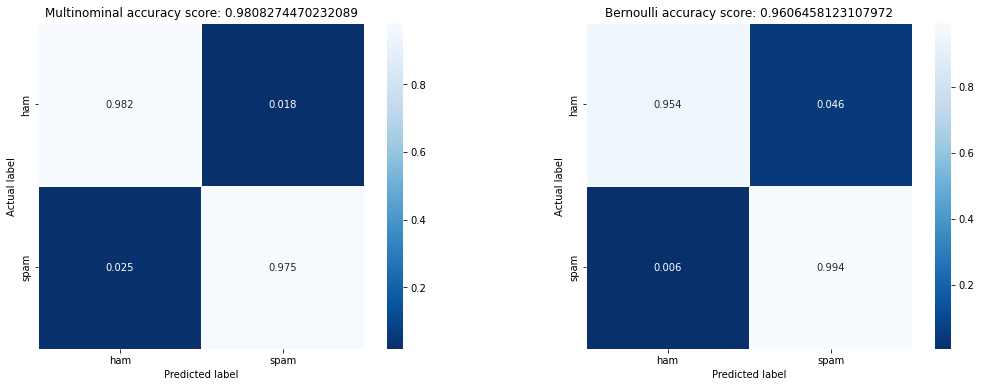

Filtering top 30% and bottom 30%:


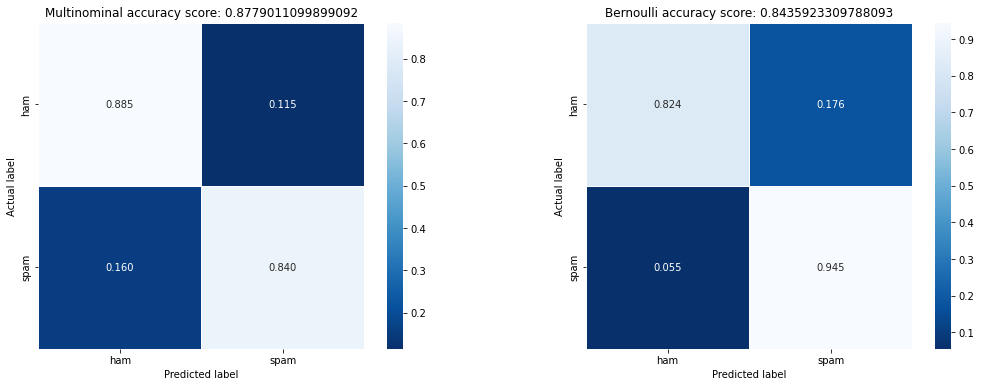

In [8]:
easy_ham = bz2_to_df(['../../datasets/20021010_easy_ham.tar.bz2'], 'ham')
hard_ham = bz2_to_df(['../../datasets/20021010_hard_ham.tar.bz2'], 'ham')
ham = pd.concat([easy_ham,hard_ham])
spam = bz2_to_df(['../../datasets/20021010_spam.tar.bz2'], 'spam')

print('Filtering top 1% and bottom 1%:')
naive_bayes(ham,spam,0.01) # 0.01 = filter top 1% and bottom 1%
print('Filtering top 30% and bottom 30%:')
naive_bayes(ham,spam,0.3) # 0.3 = filter top 30% and bottom 30%

When filtering out the top 1% and the bottom 1% the best result is attained. Both the multinominal classifier and the bernoulli classifier performs really well now, with an accuracy score of 98% for the multinominal classifier and an accuracy score of 96% for the bernoulli classifier. Even after filtering out the top 30% and the bottom 30% both of the classifiers still performs decent.

## 5. 
*Filter out the headers and the footers of the emails before you run on them. The format may 
vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not 
required. Run your program again and answer the following questions:*

Example mail without header: 

Hi Folks,

I have just installed spamassassin 2.31 in my postfix MTA server.

At first, I would like to test it just in my email account before 
applying it to the wole site.

I configured just as in the INSTALL file:

	5. Create a .forward...
	"|IFS=' ' && exec /usr/bin/procmail -f- || exit 75 #user"
	6. create a .procmailrc
	:0fw
	| /usr/bin/spamassassin -c 
			/etc/mail/spamassassin/rules

But the spams get trought it untouched. When I run it by the hand:

cat sample-spam.txt | /usr/bin/spamassassin -c 
				/etc/mail/spamassassin/rules

it does tag it as spam and send me the email.

what should I look at?

Thank you,


-- 
Luiz Felipe Ceglia 	-  Staff TereNet
lceglia@terenet.com.br	-  +55-21-9135-3679




-------------------------------------------------------
This sf.net email is sponsored by: OSDN - Tired of that same old
cell phone?  Get a new here for FREE!
https://www.inphonic.com/r.asp?r=sourceforge1&refcode1=vs3390
______________________________

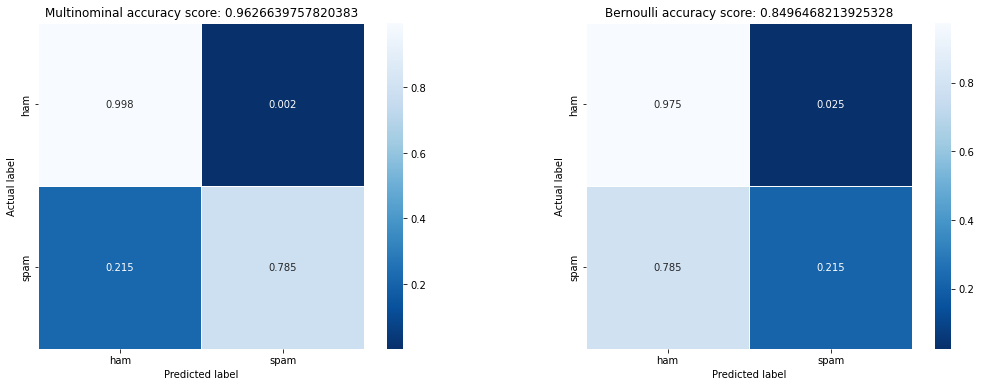

Filtering top 1% and bottom 1%:


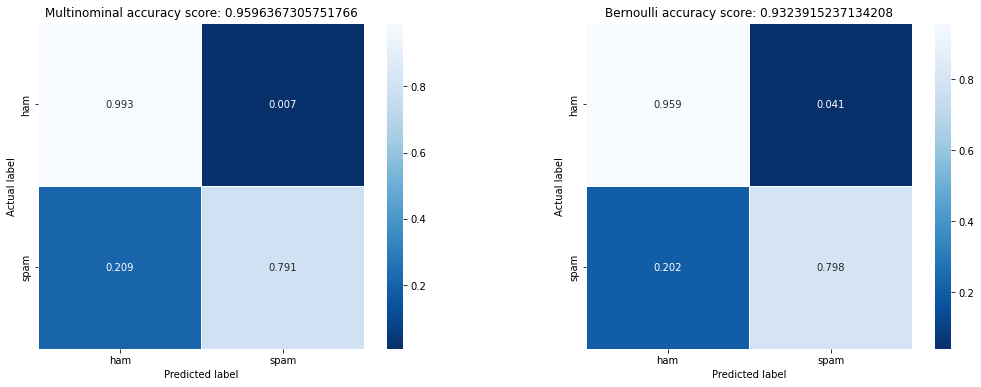

In [11]:
# Import and concatinate dataframes
easy_ham = bz2_to_df(['../../datasets/20021010_easy_ham.tar.bz2'], 'ham')
hard_ham = bz2_to_df(['../../datasets/20021010_hard_ham.tar.bz2'], 'ham')
ham = pd.concat([easy_ham,hard_ham])
spam = bz2_to_df(['../../datasets/20021010_spam.tar.bz2'], 'spam')

# Extract message part of email in ham
# and place in collumn 'email'.
p = []
for i in ham['policy']:
#     print(i)
    a = cutEmail(i)
    p.append(a)
ham['email'] = p

# Extract message part of email in spam
# and place in collumn 'email'.
p = []
for i in spam['policy']:
#     print(i)
    a = cutEmail(i)
    p.append(a)
spam['email'] = p

print('Example mail without header: \n')
print(ham['email'].iloc[11])

print('No filter:') # compare to question 3
naive_bayes(ham,spam,0.0)
print('Filtering top 1% and bottom 1%:') # compare to question 4
naive_bayes(ham,spam,0.01)

### a. 
*Does the result improve from 3 and 4?*

The result does not improve from question 3 and 4. When not filtering the data, like in question 3, similiar but worse results are attained. When filtering the data, the result improves significantly for the bernoulli method but it's still lower then in question 4.

### b. 
*The split of the data set into a training set and a test set can lead to very skewed results. 
Why is this, and do you have suggestions on remedies?*

When splitting the data into training and test sets the training set can by randomness include more ham messages than spam messages, thus learning the AI to determine ham messages better than spam. The test set on the other hand, would then include more spam messages than ham messages and the AI would not perform well since it's better at determining ham messages.

A solution to this would be to utilize the parameter stratify in the train_test_split function. Stratify would ensure that there is balance in the train and test sets regarding the distribution between ham and spam.

### c. 
*What do you expect would happen if your training set were mostly spam messages 
while your test set were mostly ham messages?*

In this scenario, the AI would be well trained on spam messages. When being tested with ham it would perform poorly since it's better at determining spam messages.